In [1]:
import pandas as pd
import numpy as np
import pickle as pkl

In [2]:
!nvidia-smi

Tue May 23 02:10:01 2023       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 530.41.03              Driver Version: 530.41.03    CUDA Version: 12.1     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                  Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf            Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  NVIDIA GeForce RTX 3090         Off| 00000000:01:00.0  On |                  N/A |
| 70%   38C    P2              111W / 350W|    468MiB / 24576MiB |      1%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

## Load GoEmotions and General Audio Datasets (CREMA, TESS,  RAVDASS, ETC)

In [3]:
train_audio = pkl.load(open('./data/c4ai_clip/train_audio.pkl', "rb"))[['path', 'label']]
test_audio = pkl.load(open('./data/c4ai_clip/test_audio.pkl', "rb"))[['path', 'label']]

In [4]:
#!unzip ./data/c4ai_clip/audio_emo_resampled.zip -d ./audio

In [5]:
def norm_labels(x):
    if x == "afraid":
        return "fear"
    elif x == "angry":
        return "anger"
    elif x == "disgusted":
        return "disgust"
    elif x == "sad":
        return "sadness"
    else:
        return x

In [6]:
train_audio["label"] = train_audio["label"].apply(norm_labels)
test_audio["label"] = test_audio["label"].apply(norm_labels)

In [7]:
pd.concat([train_audio,test_audio]).groupby("label").count()

,path
label,
anger,1863
disgust,1863
fear,1863
joy,2055
neutral,1583
sadness,1863
surprise,592


## Load Meld and Iemocap

In [8]:
train_df_erc = pd.read_csv("train_text_df.csv", index_col=0).rename(columns={"utterance":"text"})
train_df_erc["path"] = train_df_erc["path"].apply(lambda x: '/home/vmachado/Documents/' + x)
train_df_erc

,text,label,path
0,"OK, we got the cole slaw, we got the buns...",neutral,/home/vmachado/Documents/multimodal-datasets/M...
1,"OK, we got the cole slaw, we got the buns... [...",disgust,/home/vmachado/Documents/multimodal-datasets/M...
2,"OK, we got the cole slaw, we got the buns... W...",neutral,/home/vmachado/Documents/multimodal-datasets/M...
3,"Wait a minute, hold it. Johnson! Will you com...",neutral,/home/vmachado/Documents/multimodal-datasets/M...
4,"Wait a minute, hold it. Johnson! Will you com...",neutral,/home/vmachado/Documents/multimodal-datasets/M...
...,...,...,...
15862,"Right. Um, Thanks for asking, though. I mean, ...",neutral,/home/vmachado/Documents/multimodal-datasets/I...
15863,"God, that's like a whole problem with like-- B...",neutral,/home/vmachado/Documents/multimodal-datasets/I...
15864,"if you ever come out to Montgomery, I mean, yo...",neutral,/home/vmachado/Documents/multimodal-datasets/I...
15865,"call up the Sprint call center and, uh, you kn...",neutral,/home/vmachado/Documents/multimodal-datasets/I...


In [9]:
test_df_erc = pd.read_csv("test_text_df.csv", index_col=0).rename(columns={"utterance":"text"})
test_df_erc["path"] = test_df_erc["path"].apply(lambda x: '/home/vmachado/Documents/' + x)
test_df_erc

,text,label,path
0,"Brian, I need help.",sadness,/home/vmachado/Documents/multimodal-datasets/I...
1,"Brian, I need help. [CTX] Babe, I don't know w...",neutral,/home/vmachado/Documents/multimodal-datasets/I...
2,"Babe, I don't know what to tell you. Don't gi...",neutral,/home/vmachado/Documents/multimodal-datasets/I...
3,I don't--I'm just--I'm thinking maybe I should...,anger,/home/vmachado/Documents/multimodal-datasets/I...
4,"Well, of course not, but what are you going to...",anger,/home/vmachado/Documents/multimodal-datasets/I...
...,...,...,...
2753,Cantaloupe juice. Exactly. [CTX] You've tasted...,surprise,/home/vmachado/Documents/multimodal-datasets/M...
2754,Exactly. You've tasted it? You've tasted it. [...,neutral,/home/vmachado/Documents/multimodal-datasets/M...
2755,You've tasted it? You've tasted it. Uh huh. [C...,anger,/home/vmachado/Documents/multimodal-datasets/M...
2756,"Uh huh. Oh, you've tasted it. [CTX] You can ke...",neutral,/home/vmachado/Documents/multimodal-datasets/M...


In [10]:
test_df_erc["source"] = test_df_erc["path"].apply(lambda x: "meld" if "MELD" in x else "iemocap")
test_df_erc

,text,label,path,source
0,"Brian, I need help.",sadness,/home/vmachado/Documents/multimodal-datasets/I...,iemocap
1,"Brian, I need help. [CTX] Babe, I don't know w...",neutral,/home/vmachado/Documents/multimodal-datasets/I...,iemocap
2,"Babe, I don't know what to tell you. Don't gi...",neutral,/home/vmachado/Documents/multimodal-datasets/I...,iemocap
3,I don't--I'm just--I'm thinking maybe I should...,anger,/home/vmachado/Documents/multimodal-datasets/I...,iemocap
4,"Well, of course not, but what are you going to...",anger,/home/vmachado/Documents/multimodal-datasets/I...,iemocap
...,...,...,...,...
2753,Cantaloupe juice. Exactly. [CTX] You've tasted...,surprise,/home/vmachado/Documents/multimodal-datasets/M...,meld
2754,Exactly. You've tasted it? You've tasted it. [...,neutral,/home/vmachado/Documents/multimodal-datasets/M...,meld
2755,You've tasted it? You've tasted it. Uh huh. [C...,anger,/home/vmachado/Documents/multimodal-datasets/M...,meld
2756,"Uh huh. Oh, you've tasted it. [CTX] You can ke...",neutral,/home/vmachado/Documents/multimodal-datasets/M...,meld


In [11]:
disg = train_df_erc[train_df_erc["label"] == "disgust"].sample(2000, replace=True, random_state=0)
fear = train_df_erc[train_df_erc["label"] == "fear"].sample(2000, replace=True, random_state=0)
sadness = train_df_erc[train_df_erc["label"] == "sadness"].sample(1500, replace=True, random_state=0)
surprise = train_df_erc[train_df_erc["label"] == "surprise"].sample(1500, replace=True, random_state=0)

In [12]:
train_df_erc_resampled = pd.concat([train_df_erc, disg, fear, surprise, sadness]).reset_index(drop=True)

In [13]:
train_df_erc_resampled.groupby("label").count()

,text,path
label,,
anger,3510,3510
disgust,2273,2273
fear,2298,2298
joy,2937,2937
neutral,6033,6033
sadness,3022,3022
surprise,2794,2794


## Join datasets (audio)

In [14]:
from os.path import exists

In [15]:
df_train = pd.concat([train_df_erc_resampled, train_df_erc_resampled, train_audio.assign(text=[None for _ in range(len(train_audio))]), test_audio.assign(text=[None for _ in range(len(test_audio))])], axis=0).reset_index(drop=True)

In [16]:
#df_train = train_df_erc_resampled

In [17]:
df_dev = test_df_erc

In [18]:
df_train

,text,label,path
0,"OK, we got the cole slaw, we got the buns...",neutral,/home/vmachado/Documents/multimodal-datasets/M...
1,"OK, we got the cole slaw, we got the buns... [...",disgust,/home/vmachado/Documents/multimodal-datasets/M...
2,"OK, we got the cole slaw, we got the buns... W...",neutral,/home/vmachado/Documents/multimodal-datasets/M...
3,"Wait a minute, hold it. Johnson! Will you com...",neutral,/home/vmachado/Documents/multimodal-datasets/M...
4,"Wait a minute, hold it. Johnson! Will you com...",neutral,/home/vmachado/Documents/multimodal-datasets/M...
...,...,...,...
57411,None,anger,./audio/audio_emo/crema.man.angry.530.wav
57412,None,joy,./audio/audio_emo/tess.woman.happy.322.wav
57413,None,fear,./audio/audio_emo/crema.man.afraid.455.wav
57414,None,disgust,./audio/audio_emo/crema.woman.disgusted.239.wav


In [19]:
len(df_dev)

2758

In [20]:
df_train[df_train["path"] == None]

,text,label,path


In [21]:
df_dev[df_dev["path"] == None]

,text,label,path,source


In [22]:
from sklearn.preprocessing import LabelEncoder

lab_encoder = LabelEncoder()
lab_encoder.fit(df_train['label'].unique())

LabelEncoder()

In [23]:
import torch
from torch import nn
import torch.nn.functional as F
from tqdm import tqdm

In [24]:
import torch
import torch.nn as nn

class SupConLoss(nn.Module):
    """Supervised Contrastive Learning: https://arxiv.org/pdf/2004.11362.pdf.
    It also supports the unsupervised contrastive loss in SimCLR"""
    def __init__(self, temperature=0.2, contrast_mode='all',
                 base_temperature=0.2):
        super(SupConLoss, self).__init__()
        self.temperature = temperature
        self.contrast_mode = contrast_mode
        self.base_temperature = base_temperature

    def forward(self, features, labels=None, mask=None, temperature=None, base_temperature=None):
        """Compute loss for model. If both `labels` and `mask` are None,
        it degenerates to SimCLR unsupervised loss:
        https://arxiv.org/pdf/2002.05709.pdf
        Args:
            features: hidden vector of shape [bsz, n_views, ...].
            labels: ground truth of shape [bsz].
            mask: contrastive mask of shape [bsz, bsz], mask_{i,j}=1 if sample j
                has the same class as sample i. Can be asymmetric.
        Returns:
            A loss scalar.
        """
        if temperature == None:
            temperature = self.temperature
        if base_temperature == None:
            base_temperature = self.base_temperature
        device = (torch.device('cuda')
                  if features.is_cuda
                  else torch.device('cpu'))

        if len(features.shape) < 3:
            raise ValueError('`features` needs to be [bsz, n_views, ...],'
                             'at least 3 dimensions are required')
        if len(features.shape) > 3:
            features = features.view(features.shape[0], features.shape[1], -1)

        batch_size = features.shape[0]
        if labels is not None and mask is not None:
            raise ValueError('Cannot define both `labels` and `mask`')
        elif labels is None and mask is None:
            mask = torch.eye(batch_size, dtype=torch.float32).to(device)
        elif labels is not None:
            labels = labels.contiguous().view(-1, 1)
            if labels.shape[0] != batch_size:
                raise ValueError('Num of labels does not match num of features')
            mask = torch.eq(labels, labels.T).float().to(device)
        else:
            mask = mask.float().to(device)

        contrast_count = features.shape[1]
        contrast_feature = torch.cat(torch.unbind(features, dim=1), dim=0)
        if self.contrast_mode == 'one':
            anchor_feature = features[:, 1]
            anchor_count = 1
        elif self.contrast_mode == 'all':
            anchor_feature = contrast_feature
            anchor_count = contrast_count
        else:
            raise ValueError('Unknown mode: {}'.format(self.contrast_mode))

        # compute logits
        anchor_dot_contrast = torch.div(
            torch.matmul(anchor_feature, contrast_feature.T),
            temperature)
        # for numerical stability
        logits_max, _ = torch.max(anchor_dot_contrast, dim=1, keepdim=True)
        logits = anchor_dot_contrast - logits_max.detach()

        # tile mask
        mask = mask.repeat(anchor_count, contrast_count)
        # mask-out self-contrast cases
        logits_mask = torch.scatter(
            torch.ones_like(mask),
            1,
            torch.arange(batch_size * anchor_count).view(-1, 1).to(device),
            0
        )
        mask = mask * logits_mask

        # compute log_prob
        exp_logits = torch.exp(logits) * logits_mask
        log_prob = logits - torch.log(exp_logits.sum(1, keepdim=True))

        # compute mean of log-likelihood over positive
        mean_log_prob_pos = (mask * log_prob).sum(1) / mask.sum(1)

        # loss
        loss = - (temperature/base_temperature) * mean_log_prob_pos
        loss = loss.view(anchor_count, batch_size).mean()

        return loss

## MFCC Extractor and KMeans Hidden units

In [25]:
import hashlib
import torch
import librosa
from transformers import Wav2Vec2ForSequenceClassification, Wav2Vec2FeatureExtractor
import torchaudio
import numpy as np
from tqdm import tqdm
import functools
import math
import pickle as pkl
import os

sample_rate = 16000
n_fft = 400.0
frame_length = n_fft / sample_rate * 1000.0
frame_shift = frame_length / 2.0

MFCC_PARAMS = {
    "channel": 0,
    "dither": 0.0,
    "window_type": "hanning",
    "frame_length": frame_length,
    "frame_shift": frame_shift,
    "remove_dc_offset": False,
    "round_to_power_of_two": False,
    "sample_frequency": sample_rate,
}

PITCH_PARAMS = {
    "frame_length": frame_length,
    "frame_shift": frame_shift,
    "sample_rate": sample_rate,
}

def get_feats(x, sr, max_pool_window_size=8, params=MFCC_PARAMS, params_pitch=PITCH_PARAMS):
    pitch = torchaudio.functional.compute_kaldi_pitch(x, **params_pitch).squeeze(dim=0)
    
    x = x.view(1, -1)

    mfccs = torchaudio.compliance.kaldi.mfcc(
        x,
        **params
    )  # (time, freq)
    
    try:
        mfccs = torch.cat([mfccs, pitch], dim=-1)
    except:
        mfccs = torch.cat([mfccs, torch.Tensor(np.zeros((mfccs.shape[0], 2)))], dim=-1)
    
    mfccs_z = torch.Tensor(np.zeros(((mfccs.shape[0] // max_pool_window_size) + 1, mfccs.shape[1])))
    
    for i in range(len(mfccs) // max_pool_window_size): # Max pooling over time to reduce sequence size
        
        mfcc_win = mfccs[i*max_pool_window_size:(i+1)*max_pool_window_size]
        
        norms = [np.linalg.norm(v[:-2]) for v in mfcc_win]
        
        argmax = np.argmax(np.array(norms))
        
        mfccs_z[i] = mfcc_win[argmax]
            
    mfccs = mfccs_z.transpose(0, 1)  # (freq, time)
    deltas = torchaudio.functional.compute_deltas(mfccs)
    ddeltas = torchaudio.functional.compute_deltas(deltas)
    concat = torch.cat([mfccs, deltas, ddeltas], dim=0)
    concat = concat.transpose(0, 1).contiguous()
    
    return concat

def mfcc_feature_extractor(path, desired_sr=16000, cache="./preprocessed_audio_cache_new"):
    hashed_name = hashlib.md5(path.encode('utf-8')).hexdigest()
    hashed_path = cache + '/' + f"{hashed_name}.bin"
    with torch.no_grad():
        if os.path.isfile(hashed_path):
            return torch.load(hashed_path)
        else:
            waveform, sample_rate = torchaudio.load(path, normalize=True, channels_first=True)
            waveform = waveform.float()
            if len(waveform.shape) == 2:
                waveform = torch.mean(waveform, dim=0).unsqueeze(dim=0)

            if sample_rate != desired_sr:
                transform = torchaudio.transforms.Resample(sample_rate, desired_sr)
                waveform = transform(waveform)

            mfcc = get_feats(waveform, desired_sr)
            torch.save(mfcc, hashed_path)
            return mfcc

In [26]:
def get_data_cluster(path):
    mfcc_audio = mfcc_feature_extractor(path)
    return mfcc_audio

In [27]:
#!rm ./preprocessed_audio_cache_new/*.bin

In [28]:
get_data_cluster("./audio/audio_emo/tess.woman.sad.5.wav")

tensor([[-5.4309e+01, -3.1988e+01, -7.8407e+00,  ..., -1.8087e-01,
          3.8561e-02, -5.1493e-01],
        [-3.8823e+01, -5.1685e+01,  8.3763e+00,  ...,  7.4972e-02,
          3.7470e-02, -1.1044e+00],
        [-3.5162e+01, -4.5723e+01,  1.9573e+00,  ..., -2.1068e-02,
          5.1817e-03, -1.3984e+00],
        ...,
        [-5.1898e+01, -8.1007e+00, -3.3212e-01,  ..., -3.4673e+00,
         -1.0746e-01, -1.9288e+01],
        [-6.4814e+01, -1.1119e+01,  1.3244e+01,  ..., -2.2259e+00,
         -8.7170e-02, -1.4978e+01],
        [ 0.0000e+00,  0.0000e+00,  0.0000e+00,  ..., -1.0582e+00,
         -3.0667e-02, -4.2674e+00]])

In [29]:
get_data_cluster("./audio/audio_emo/tess.woman.sad.6.wav").shape

torch.Size([28, 45])

## Add mask to Transformer, try learned positional embeddings

In [30]:
!pip install vector-quantize-pytorch

In [31]:
from joblib import Parallel, delayed
from vector_quantize_pytorch import VectorQuantize, GroupedResidualVQ
from vector_quantize_pytorch import ResidualVQ

class PositionalEncoding(nn.Module):

    def __init__(self, d_model: int, dropout: float = 0.1, max_len: int = 5000):
        super().__init__()
        self.dropout = nn.Dropout(p=dropout)

        position = torch.arange(max_len).unsqueeze(1)
        div_term = torch.exp(torch.arange(0, d_model, 2) * (-math.log(10000.0) / d_model))
        pe = torch.zeros(max_len, 1, d_model)
        pe[:, 0, 0::2] = torch.sin(position * div_term)
        pe[:, 0, 1::2] = torch.cos(position * div_term)
        self.register_buffer('pe', pe)

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        """
        Args:
            x: Tensor, shape [seq_len, batch_size, embedding_dim]
        """
        x = x + self.pe[:x.size(0)]
        return self.dropout(x)

class AudioEncoderMFCCHU(nn.Module):

    def __init__(self, 
                 clusterization_model, 
                 vocab_size,
                 cluster_data_mean,
                 cluster_data_std,
                 emb_dim=768, 
                 n_layers=6, 
                 max_length=800,
                 raw_features_size=45,
                 nheads=8, 
                 dropout=0.2):
        super(AudioEncoderMFCCHU, self).__init__()
        
        self.cluster_data_mean = cluster_data_mean
        self.cluster_data_std = cluster_data_std
        self.clusterization_model = clusterization_model
        self.vocab_size = vocab_size
        
        self.max_length = max_length
        
        """
        self.vq = ResidualVQ(
            dim = raw_features_size,
            codebook_size = self.vocab_size,
            codebook_dim = 16,
            num_quantizers = 3,
            kmeans_init = True,
            kmeans_iters = 100,
        )"""
        
        self.vq = VectorQuantize(
            dim = raw_features_size,
            codebook_size = self.vocab_size,
            codebook_dim = 64,
            use_cosine_sim = True,
            #num_quantizers = 4,
            kmeans_init = True,
            kmeans_iters = 100,
            #groups=5,
        )
        
        self.pos_encoder = PositionalEncoding(emb_dim, dropout) # max batch size
        self.project = nn.Sequential(nn.Linear(raw_features_size, emb_dim))
        
        self.emb_dim = emb_dim
        self.dropout = dropout
        self.transf_layer = nn.TransformerEncoderLayer(d_model=emb_dim, dim_feedforward=emb_dim*4, nhead=nheads, batch_first=True)
        self.transf_enc = nn.TransformerEncoder(self.transf_layer, num_layers=n_layers, norm=nn.LayerNorm(emb_dim))
        
        self.norm_mfcc = nn.LayerNorm(raw_features_size)

    def preprocess_audio(self, path):
        with torch.no_grad():
            mfcc = (mfcc_feature_extractor(path) - self.cluster_data_mean) / (self.cluster_data_std + 1e-10)
        
        mfcc = self.norm_mfcc(mfcc.to(0))
        qtz_mfcc, _, vq_loss = self.vq(mfcc)
        l = len(qtz_mfcc)
        att_mask = torch.ones((self.max_length, 1)).to(0)
        
        if l > self.max_length:
            qtz_mfcc = qtz_mfcc[:self.max_length]
        elif l < self.max_length:
            mask_idx = torch.Tensor([i + l for i in range(self.max_length - l)]).long().to(0)
            att_mask = att_mask.index_fill_(0, mask_idx, 0.0)
            repeat = torch.zeros((self.max_length - l, qtz_mfcc.shape[1])).to(0)
            qtz_mfcc = torch.cat([qtz_mfcc, repeat], dim=0)
            
        qtz_mfcc = qtz_mfcc.unsqueeze(dim=0)
        att_mask = att_mask.unsqueeze(dim=0).squeeze(dim=-1)
        return qtz_mfcc, att_mask, vq_loss
    
    def forward(self, audio_paths):
        
        features = list(map(self.preprocess_audio, audio_paths))
        x = torch.cat([t for t, _, _ in features], axis=0)
        att_masks = torch.cat([a for _, a, _ in features], axis=0)
        vq_loss = torch.cat([l for _, _, l in features]).to(0).mean()
        
        assert len(x) == len(audio_paths)
            
        #att_masks = F.dropout(att_masks, p=self.dropout, training=self.training)
        
        seq_lens = 1/torch.sum(att_masks, dim=-1)
        seq_lens = seq_lens.unsqueeze(dim=0).T

        x = self.project(x)
        x = self.pos_encoder(x)

        x = self.transf_enc(x, src_key_padding_mask=att_masks)
        x = seq_lens * torch.sum(x, dim=1)
        
        return x, vq_loss

In [32]:
class AudioCLIP(nn.Module):

    def __init__(self, 
                 audio_encoder, 
                 out_features_audio=16, 
                 wide_proj=1024, 
                 proj_size=128, 
                 rate=0.1):
        super(AudioCLIP, self).__init__()

        self.audio_encoder = audio_encoder
        self.wide_proj = nn.Sequential(nn.Linear(out_features_audio, wide_proj), nn.GELU(), nn.Linear(wide_proj, wide_proj))
        self.compressed_proj = nn.Linear(wide_proj, proj_size)
        self.rate = rate
        
    def forward(self, paths):
        
        x, vq_loss = self.audio_encoder(paths)
        clf_emb = F.normalize(self.wide_proj(x), dim=-1)
        x1 = F.dropout(clf_emb, p=self.rate, training=self.training)
        x1 = F.normalize(self.compressed_proj(x1), dim=-1)
        
        return x1, clf_emb, vq_loss

In [33]:
df_train['label'].unique()

array(['neutral', 'disgust', 'anger', 'sadness', 'joy', 'surprise',
       'fear'], dtype=object)

In [34]:
train_ds = torch.utils.data.TensorDataset(torch.Tensor(list(range(len(df_train)))))
train_loader = torch.utils.data.DataLoader(train_ds, batch_size=4096, shuffle=True)

test_ds = torch.utils.data.TensorDataset(torch.Tensor(list(range(len(df_dev)))))
test_loader = torch.utils.data.DataLoader(test_ds, batch_size=4096, shuffle=False)

In [35]:
import torchaudio
import numpy as np
from sklearn.manifold import TSNE
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.metrics import f1_score, accuracy_score
import gc
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import MiniBatchKMeans
import pickle
gc.enable()

In [36]:
gc.collect()

0

In [37]:
import numpy as np
import faiss


class FaissKNeighbors:
    def __init__(self, k=5):
        self.index = None
        self.y = None
        self.k = k

    def fit(self, X, y):
        self.index = faiss.IndexFlatL2(X.shape[1])
        self.index.add(X.astype(np.float32))
        self.y = y

    def predict(self, X):
        distances, indices = self.index.search(X.astype(np.float32), k=self.k)
        votes = self.y[indices]
        predictions = np.array([np.argmax(np.bincount(x)) for x in votes])
        return predictions

In [38]:
from torch.optim import Optimizer
from torch.optim.lr_scheduler import _LRScheduler

class Scheduler(_LRScheduler):
    def __init__(self, 
                 optimizer: Optimizer,
                 dim_embed: int,
                 warmup_steps: int,
                 last_epoch: int=-1,
                 verbose: bool=False) -> None:

        self.dim_embed = dim_embed
        self.warmup_steps = warmup_steps
        self.num_param_groups = len(optimizer.param_groups)

        super().__init__(optimizer, last_epoch, verbose)
        
    def get_lr(self) -> float:
        lr = calc_lr(self._step_count, self.dim_embed, self.warmup_steps)
        return [lr] * self.num_param_groups


def calc_lr(step, dim_embed, warmup_steps):
    return dim_embed**(-0.5) * min(step**(-0.5), step * warmup_steps**(-1.5))

# add cluster ensembles

In [39]:
#mk = Parallel(n_jobs=12)(delayed(get_data_cluster)(x) for x in df_train["path"])
#mk = [len(m) for m in mk]

In [40]:
#np.arange(0.1, 1, 0.05)

In [41]:
#np.quantile(mk, q = 0.85)

In [42]:
#np.quantile(mk, q = np.arange(0.1, 1, 0.05))

In [43]:
X = Parallel(n_jobs=12)(delayed(get_data_cluster)(x) for x in df_train["path"])
X = torch.cat(X, dim=0)

mean = torch.mean(X, axis=0)
std = torch.std(X, axis=0)

"""
mean = torch.mean(X, axis=-0)
std = torch.std(X, axis=0)

X = (X - mean)/(std+1e-5)

N_CLUSTERS = 100
kmeans = MiniBatchKMeans(n_clusters=N_CLUSTERS,
                          random_state=0,
                          batch_size=300_000,
                          n_init=1,
                          init="k-means++").fit(X)
                          
# DEV 

N_CLUSTERS_P = [32, 64, 128, 256, 512]

from sklearn.cluster import MiniBatchKMeans
inertias = []
for k in N_CLUSTERS_P:
    kmeans = MiniBatchKMeans(n_clusters=k,
                          random_state=0,
                          batch_size=300_000,
                          max_iter=1000000,
                          n_init=1,
                          init="k-means++").fit(X)
    kmeans.fit(X) 
    inertias.append(kmeans.inertia_)
    
import matplotlib.pyplot as plt
plt.plot(N_CLUSTERS_P, inertias)
plt.show()

X_t = list(map(get_data_cluster, df_train["path"]))
print(pd.DataFrame([x.numpy().shape for x in X_t]).describe())
print(pd.DataFrame([x.numpy().shape for x in X_t]).quantile(q=0.95))
# 800 max length will cover most of train samples
# best cluster number == 128
"""

'\nmean = torch.mean(X, axis=-0)\nstd = torch.std(X, axis=0)\n\nX = (X - mean)/(std+1e-5)\n\nN_CLUSTERS = 100\nkmeans = MiniBatchKMeans(n_clusters=N_CLUSTERS,\n                          random_state=0,\n                          batch_size=300_000,\n                          n_init=1,\n                          init="k-means++").fit(X)\n                          \n# DEV \n\nN_CLUSTERS_P = [32, 64, 128, 256, 512]\n\nfrom sklearn.cluster import MiniBatchKMeans\ninertias = []\nfor k in N_CLUSTERS_P:\n    kmeans = MiniBatchKMeans(n_clusters=k,\n                          random_state=0,\n                          batch_size=300_000,\n                          max_iter=1000000,\n                          n_init=1,\n                          init="k-means++").fit(X)\n    kmeans.fit(X) \n    inertias.append(kmeans.inertia_)\n    \nimport matplotlib.pyplot as plt\nplt.plot(N_CLUSTERS_P, inertias)\nplt.show()\n\nX_t = list(map(get_data_cluster, df_train["path"]))\nprint(pd.DataFrame([x.numpy().s

In [44]:
#Parallel(n_jobs=12)(delayed(get_data_cluster)(x) for x in test_df_erc["path"])

In [45]:
gc.collect()

26926

100%|████████████████████████████████████████████████████████████████████| 1/1 [00:02<00:00,  2.52s/it]


General - KNN F1: 0.18867800954735042 Acc: 0.31000725163161713
Iemocap - KNN F1: 0.14628206212347303 Acc: 0.24545454545454545
Meld - KNN F1: 0.2686306870704143 Acc: 0.40613718411552346
Iemocap - KNN F1 (macro): 0.0821035318916139
Meld - KNN F1 (macro): 0.10666929833127704


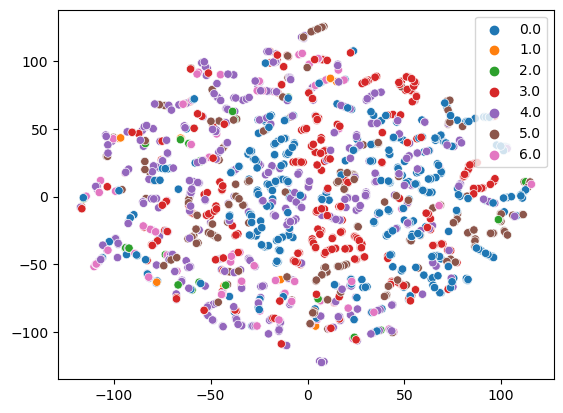

Epoch: 1 - Train Loss: 8.418739382425944


100%|████████████████████████████████████████████████████████████████████| 1/1 [00:02<00:00,  2.52s/it]


General - KNN F1: 0.22686384797899892 Acc: 0.3147208121827411
Iemocap - KNN F1: 0.20708276703904435 Acc: 0.26666666666666666
Meld - KNN F1: 0.2683624850400148 Acc: 0.3862815884476534
Iemocap - KNN F1 (macro): 0.11662139823326026
Meld - KNN F1 (macro): 0.110205346889531


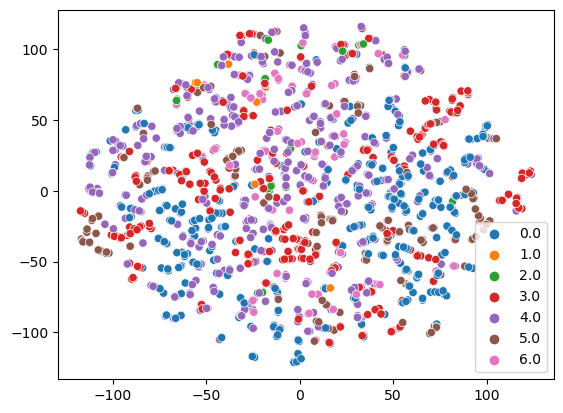

Epoch: 2 - Train Loss: 8.240734608968099


100%|████████████████████████████████████████████████████████████████████| 1/1 [00:02<00:00,  2.31s/it]


General - KNN F1: 0.23036883305578099 Acc: 0.3110949963741842
Iemocap - KNN F1: 0.20781610042334417 Acc: 0.25696969696969696
Meld - KNN F1: 0.2766946823682519 Acc: 0.3916967509025271
Iemocap - KNN F1 (macro): 0.13094859973578424
Meld - KNN F1 (macro): 0.1282123285670446


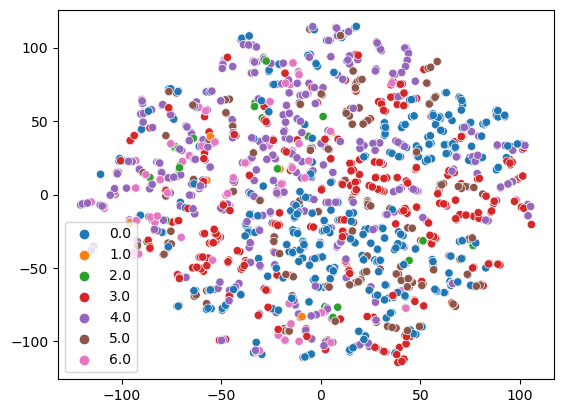

Epoch: 3 - Train Loss: 8.188775857289633


100%|████████████████████████████████████████████████████████████████████| 1/1 [00:02<00:00,  2.27s/it]


General - KNN F1: 0.20193330186099173 Acc: 0.2951414068165337
Iemocap - KNN F1: 0.1680243236201041 Acc: 0.2412121212121212
Meld - KNN F1: 0.2681247552512958 Acc: 0.37545126353790614
Iemocap - KNN F1 (macro): 0.10535680487812392
Meld - KNN F1 (macro): 0.11609912570503704


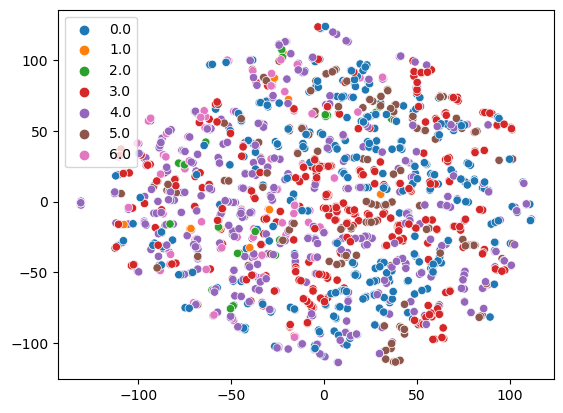

Epoch: 4 - Train Loss: 8.137055079142252


100%|████████████████████████████████████████████████████████████████████| 1/1 [00:02<00:00,  2.62s/it]


General - KNN F1: 0.23775446406029183 Acc: 0.32124728063814356
Iemocap - KNN F1: 0.2132914240145605 Acc: 0.27636363636363637
Meld - KNN F1: 0.2861267568425249 Acc: 0.388086642599278
Iemocap - KNN F1 (macro): 0.11594117436520959
Meld - KNN F1 (macro): 0.13529487358932937


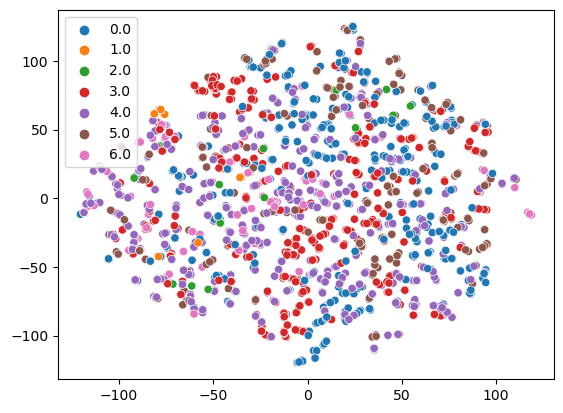

Epoch: 5 - Train Loss: 8.097490151723227


100%|████████████████████████████████████████████████████████████████████| 1/1 [00:02<00:00,  2.35s/it]


General - KNN F1: 0.23355759953895747 Acc: 0.3096446700507614
Iemocap - KNN F1: 0.2116779300704708 Acc: 0.2690909090909091
Meld - KNN F1: 0.2817192268020965 Acc: 0.3700361010830325
Iemocap - KNN F1 (macro): 0.1202913454995904
Meld - KNN F1 (macro): 0.13163835419314326


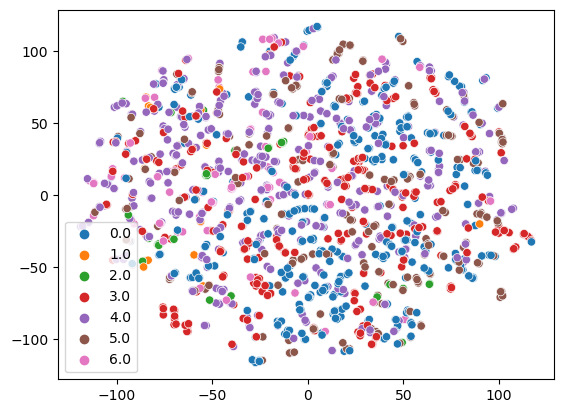

Epoch: 6 - Train Loss: 8.073261260986328


100%|████████████████████████████████████████████████████████████████████| 1/1 [00:02<00:00,  2.35s/it]


General - KNN F1: 0.23440358167865796 Acc: 0.3158085569253082
Iemocap - KNN F1: 0.20356074336859814 Acc: 0.26545454545454544
Meld - KNN F1: 0.29196381031261387 Acc: 0.3907942238267148
Iemocap - KNN F1 (macro): 0.11545656677360973
Meld - KNN F1 (macro): 0.1405084004132928


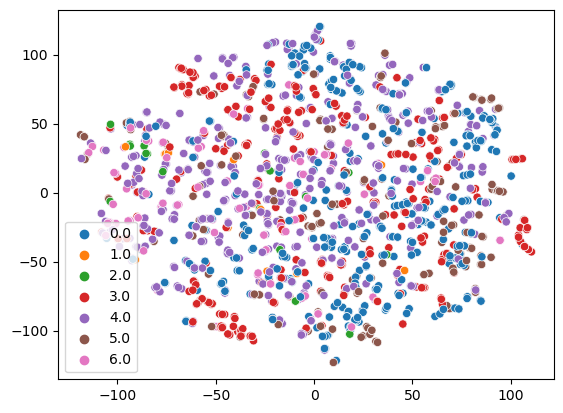

Epoch: 7 - Train Loss: 8.061019198099773


100%|████████████████████████████████████████████████████████████████████| 1/1 [00:02<00:00,  2.28s/it]


General - KNN F1: 0.24837565595583525 Acc: 0.3216098622189993
Iemocap - KNN F1: 0.23663062076690605 Acc: 0.2878787878787879
Meld - KNN F1: 0.27649522017986555 Acc: 0.37184115523465705
Iemocap - KNN F1 (macro): 0.1360913601523151
Meld - KNN F1 (macro): 0.12333242653706221


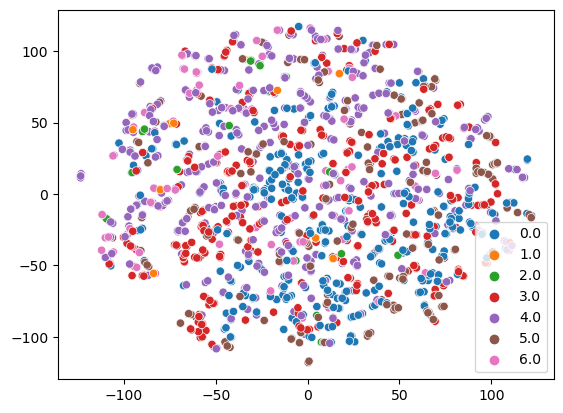

Epoch: 8 - Train Loss: 8.055228900909423


100%|████████████████████████████████████████████████████████████████████| 1/1 [00:02<00:00,  2.28s/it]


General - KNN F1: 0.21932963226613048 Acc: 0.2907904278462654
Iemocap - KNN F1: 0.19133059982545045 Acc: 0.25212121212121213
Meld - KNN F1: 0.2754893842280462 Acc: 0.3483754512635379
Iemocap - KNN F1 (macro): 0.11297586703296238
Meld - KNN F1 (macro): 0.13521715854630265


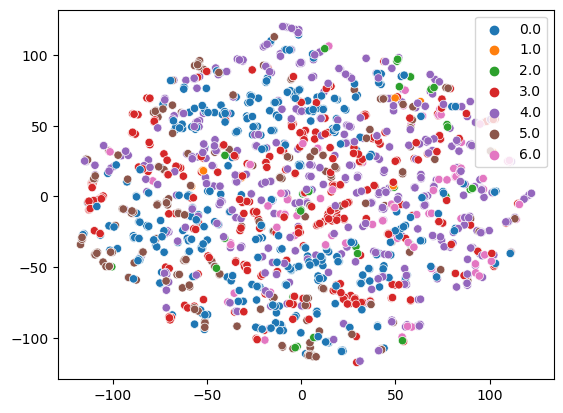

Epoch: 9 - Train Loss: 8.05181884765625


100%|████████████████████████████████████████████████████████████████████| 1/1 [00:02<00:00,  2.32s/it]


General - KNN F1: 0.22124960094146973 Acc: 0.29405366207396666
Iemocap - KNN F1: 0.1989551069197713 Acc: 0.2515151515151515
Meld - KNN F1: 0.26827710797844057 Acc: 0.3574007220216607
Iemocap - KNN F1 (macro): 0.12312940848912916
Meld - KNN F1 (macro): 0.12337364537598905


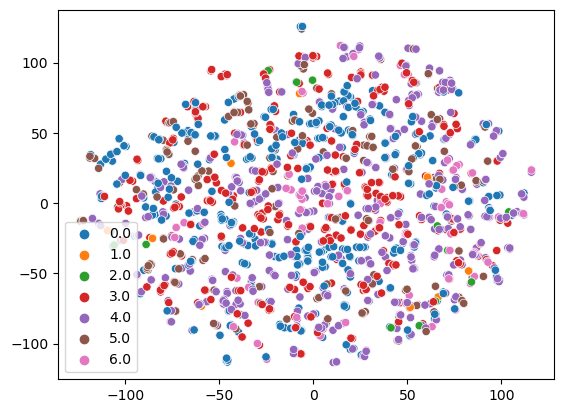

Epoch: 10 - Train Loss: 8.049211438496908


100%|████████████████████████████████████████████████████████████████████| 1/1 [00:02<00:00,  2.26s/it]


General - KNN F1: 0.2136687732348375 Acc: 0.298404641044235
Iemocap - KNN F1: 0.19007129179337864 Acc: 0.24909090909090909
Meld - KNN F1: 0.260989866021063 Acc: 0.37184115523465705
Iemocap - KNN F1 (macro): 0.10619230637773723
Meld - KNN F1 (macro): 0.1050626038195029


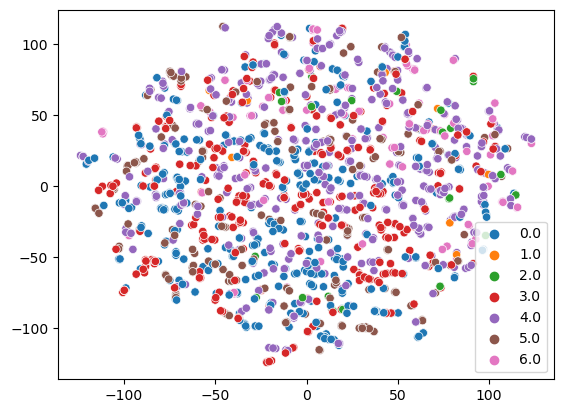

Epoch: 11 - Train Loss: 8.0479811668396


 13%|████████▉                                                          | 2/15 [00:15<01:40,  7.71s/it]


KeyboardInterrupt: 

In [46]:
PATH_TO_SAVE = "./audio_encoder_pre_trained_reformed_3"
!mkdir -p {PATH_TO_SAVE}

dim_embed = 64
N_CLUSTERS = 256

#pickle.dump(kmeans, open(f"{PATH_TO_SAVE}/kmeans_{N_CLUSTERS}_clusters_curr.pkl", 'wb'))

audio_encoder = AudioEncoderMFCCHU(
    None, 
    N_CLUSTERS, 
    mean, 
    std, 
    emb_dim=dim_embed, 
    n_layers=3, 
    max_length=64, 
    nheads=8,
    dropout=0.1
)

supcon_model = AudioCLIP(
    audio_encoder,
    out_features_audio=dim_embed,
    wide_proj=dim_embed*4, 
    proj_size=dim_embed, 
    rate=0.1,
)

supcon_loss = SupConLoss(temperature=0.1, contrast_mode='all', base_temperature=0.1)
supcon_model.to(0)
scaler = torch.cuda.amp.GradScaler()

step = 0
e = 0
patience = 9999
early_stop_flag = 0
old_f1 = -float('inf')

param_optimizer = list(supcon_model.named_parameters())
no_decay = ['bias', 'gamma', 'beta']
optimizer_grouped_parameters = [{
    'params':
    [p for n, p in param_optimizer if not any(nd in n for nd in no_decay)],
    'weight_decay_rate':
    0.001
}, {
    'params':
    [p for n, p in param_optimizer if any(nd in n for nd in no_decay)],
    'weight_decay_rate':
    0.0
}]

opt = torch.optim.AdamW(optimizer_grouped_parameters, lr=0, betas=(0.9, 0.98), eps=1e-8)

warmup_steps=300
epochs = 9999

scheduler = Scheduler(opt, dim_embed, warmup_steps)

while e < epochs:
    supcon_model.train()
    epoch_loss = 0.0
    proj_val = []
    targets_val = []

    proj_train = []
    targets_train = []

    preds = []

    for i, batch_indices in enumerate(tqdm(train_loader, total=len(train_loader))):
        
        batch = df_train.iloc[batch_indices[0]]
        audio_paths = list(batch["path"])
        
        target = torch.Tensor(lab_encoder.transform(list(batch["label"])))
        
        with torch.cuda.amp.autocast(enabled=True, dtype=torch.float16) as autocast, torch.backends.cuda.sdp_kernel(enable_flash=False) as disable:

            out, wide, vq_loss = supcon_model(audio_paths)
            out = out.unsqueeze(dim=1)
            
            loss = supcon_loss(out, labels=target) + 0.9 * vq_loss
            
        scaler.scale(loss).backward()
        scaler.unscale_(opt)

        torch.nn.utils.clip_grad_norm_(supcon_model.parameters(), 20.0)
        scaler.step(opt)
        scaler.update()
        scheduler.step()
        opt.zero_grad(set_to_none=True)

        epoch_loss += loss.item()
        proj_train.append(np.array(wide.detach().cpu()))
        targets_train.append(np.array(target.cpu()))
        
        del out
        del wide
        gc.collect()
        torch.cuda.empty_cache()
        
    proj_train = np.concatenate(proj_train, axis=0)
    targets_train = np.concatenate(targets_train, axis=0)

    clf = FaissKNeighbors(k=128)
    clf.fit(proj_train, np.array(targets_train, dtype=int))

    epoch_loss = epoch_loss/len(train_loader)
    supcon_model.eval()
    
    for i, batch_indices in enumerate(tqdm(test_loader, total=len(test_loader))):
        with torch.no_grad():
        
            batch = test_df_erc.iloc[batch_indices[0]]
            audio_paths = list(batch["path"])

            target = torch.Tensor(lab_encoder.transform(list(batch["label"])))

            with torch.cuda.amp.autocast(enabled=True, dtype=torch.float16) as autocast, torch.backends.cuda.sdp_kernel(enable_flash=False) as disable:
                _, wide, _ = supcon_model(audio_paths)

            wide = np.array(wide.cpu())
            pred = clf.predict(wide)

            assert len(wide) == len(pred)

            preds.append(pred)
            proj_val.append(wide)
            targets_val.append(np.array(target.cpu()))

            del wide
            gc.collect()
            torch.cuda.empty_cache()

    proj_val = np.concatenate(proj_val, axis=0)
    targets_val = np.concatenate(targets_val, axis=0)
    preds = np.array(np.concatenate(preds, axis=0))

    general_f1 = f1_score(targets_val, preds, average='weighted')
    general_acc = accuracy_score(targets_val, preds)
    
    meld_idx = test_df_erc[test_df_erc["source"] == "meld"].index
    iemocap_idx = test_df_erc[test_df_erc["source"] != "meld"].index
    
    general_f1_iemocap = f1_score(targets_val[iemocap_idx], preds[iemocap_idx], average='weighted')
    general_acc_iemocap = accuracy_score(targets_val[iemocap_idx], preds[iemocap_idx])
    
    general_f1_meld = f1_score(targets_val[meld_idx], preds[meld_idx], average='weighted')
    general_acc_meld = accuracy_score(targets_val[meld_idx], preds[meld_idx])
    
    print(f'General - KNN F1: {general_f1} Acc: {general_acc}')
    print(f'Iemocap - KNN F1: {general_f1_iemocap} Acc: {general_acc_iemocap}')
    print(f'Meld - KNN F1: {general_f1_meld} Acc: {general_acc_meld}')
    
    print(f"Iemocap - KNN F1 (macro): {f1_score(targets_val[iemocap_idx], preds[iemocap_idx], average='macro')}")
    print(f"Meld - KNN F1 (macro): {f1_score(targets_val[meld_idx], preds[meld_idx], average='macro')}")
    
    idx = np.random.randint(len(proj_val), size=2000)

    proj_val_samp = proj_val[idx, :]
    targets_val_samp = targets_val[idx]
    tsne = TSNE(n_components=2, learning_rate='auto', init='pca', perplexity=5).fit_transform(proj_val_samp)

    sns.scatterplot(x=tsne[:, 0], y=tsne[:, 1], hue=targets_val_samp, palette='tab10')
    plt.show()

    print(f'Epoch: {e + 1} - Train Loss: {epoch_loss}')
    e += 1

    with open(f"{PATH_TO_SAVE}/metrics_epoch_{e}.txt", "w") as f:
        f.write(f'General - KNN F1 (weighted): {general_f1} Acc: {general_acc}')
        f.write(f'Iemocap - KNN F1: {general_f1_iemocap} Acc: {general_acc_iemocap}')
        f.write(f'Meld - KNN F1: {general_f1_meld} Acc: {general_acc_meld}')
        
    if general_f1 > old_f1 or general_f1_iemocap > old_f1_iemocap or general_f1_meld > old_f1_meld:
        checkpoint = {"model": supcon_model.state_dict(),
                  "optimizer": opt.state_dict(),
                  "scaler": scaler.state_dict()}
        torch.save(checkpoint, f'{PATH_TO_SAVE}/pytorch_model_AudioCLIP_epoch_{e}.bin')

In [ ]:
dim_embed=768

audio_encoder = AudioEncoderMFCCHU(
    None, 
    128, 
    0, 
    0, 
    emb_dim=dim_embed, 
    n_layers=1, 
    max_length=384, 
    nheads=12
)

supcon_model = AudioCLIP(
    audio_encoder,
    out_features_audio=dim_embed,
    wide_proj=1024, 
    proj_size=128, 
    rate=0.1,
)

In [ ]:
audio_encoder_state = torch.load(f'./audio_encoder_pre_trained_reformed/pytorch_model_AudioCLIP_epoch_48.bin')
supcon_model.load_state_dict(audio_encoder_state['model'])

In [ ]:
torch.save(supcon_model.audio_encoder.state_dict(), f'./audio_encoder_pre_trained_reformed/audio_best.bin')

In [ ]:
audio_encoder_state['model']

In [ ]:
print(audio_paths)

In [ ]:
xxx